# Business Objetive : Creating a data driven strategy for optimizing car pricess and improve the profit of the company

### Importing the data

In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [248]:
df =pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Datasets\Car Brand.csv")

### Understanding Data

In [251]:
df.shape

(11914, 16)

In [253]:
df.memory_usage().sum()/1024/1024

1.4544715881347656

In [255]:
df.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

In [257]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [259]:
#changing the column name
df.rename({'Engine Fuel Type':'Fuel type',
          'Engine HP':'Horse power',
          'Engine Cylinders':'Cylinders',
          'MSRP':'Price'},inplace=True,axis=1)
        

In [261]:
df.head(2)

Make       Model  Year                    Fuel type  Horse power  Cylinders  \
0  BMW  1 Series M  2011  premium unleaded (required)        335.0        6.0   
1  BMW    1 Series  2011  premium unleaded (required)        300.0        6.0   

  Transmission Type     Driven_Wheels  Number of Doors  \
0            MANUAL  rear wheel drive              2.0   
1            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   

   highway MPG  city mpg  Popularity  Price  
0           26        19        3916  46135  
1           28        19        3916  40650

### Data cleaning

In [265]:
df.isna().sum()  # to find the missing values and fill with the acual data

Make                    0
Model                   0
Year                    0
Fuel type               3
Horse power            69
Cylinders              30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
Price                   0
dtype: int64

In [267]:
df[df['Fuel type'].isna()]

Make   Model  Year Fuel type  Horse power  Cylinders  \
11321  Suzuki  Verona  2004       NaN        155.0        6.0   
11322  Suzuki  Verona  2004       NaN        155.0        6.0   
11323  Suzuki  Verona  2004       NaN        155.0        6.0   

      Transmission Type      Driven_Wheels  Number of Doors Market Category  \
11321         AUTOMATIC  front wheel drive              4.0             NaN   
11322         AUTOMATIC  front wheel drive              4.0             NaN   
11323         AUTOMATIC  front wheel drive              4.0             NaN   

      Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity  Price  
11321      Midsize         Sedan           25        17         481  17199  
11322      Midsize         Sedan           25        17         481  20199  
11323      Midsize         Sedan           25        17         481  18499

In [269]:
df['Fuel type'].fillna('flex-fuel (unleaded/natural gas)',inplace=True)

In [271]:
df['Horse power']=df.groupby(by='Make')['Horse power'].transform(lambda x: x.fillna(x.mean()))

In [273]:
df['Horse power'].fillna(df['Horse power'].mean(),inplace=True)

In [275]:


df.isna().sum()

Make                    0
Model                   0
Year                    0
Fuel type               0
Horse power             0
Cylinders              30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
Price                   0
dtype: int64

In [277]:
df['Cylinders']=df.groupby(by='Make')['Cylinders'].transform(lambda x: x.fillna(x.median()))

In [279]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Fuel type               0
Horse power             0
Cylinders               0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
Price                   0
dtype: int64

In [281]:



df['Number of Doors'].fillna(4,inplace=True)

In [283]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Fuel type               0
Horse power             0
Cylinders               0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
Price                   0
dtype: int64

In [285]:
df['Market Category'].fillna(df['Market Category'].mode()[0],inplace=True)

In [287]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Fuel type            0
Horse power          0
Cylinders            0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
Price                0
dtype: int64

In [289]:
df.duplicated().sum()

715

In [291]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [293]:
df.duplicated().sum()

0

In [295]:
df.select_dtypes(exclude='object')

Year  Horse power  Cylinders  Number of Doors  highway MPG  city mpg  \
0      2011        335.0        6.0              2.0           26        19   
1      2011        300.0        6.0              2.0           28        19   
2      2011        300.0        6.0              2.0           28        20   
3      2011        230.0        6.0              2.0           28        18   
4      2011        230.0        6.0              2.0           28        18   
...     ...          ...        ...              ...          ...       ...   
11194  2012        300.0        6.0              4.0           23        16   
11195  2012        300.0        6.0              4.0           23        16   
11196  2012        300.0        6.0              4.0           23        16   
11197  2013        300.0        6.0              4.0           23        16   
11198  2006        221.0        6.0              4.0           26        17   

       Popularity  Price  
0            3916  46135  
1            3916  40650  
2            3916  36350  
3            3916  29450  
4            3916  34500  
...           ...    ...  
11194         204  46120  
11195         204  56670  
11196         204  50620  
11197         204  50920  
11198          61  28995  

[11199 rows x 8 columns]

<Axes: >

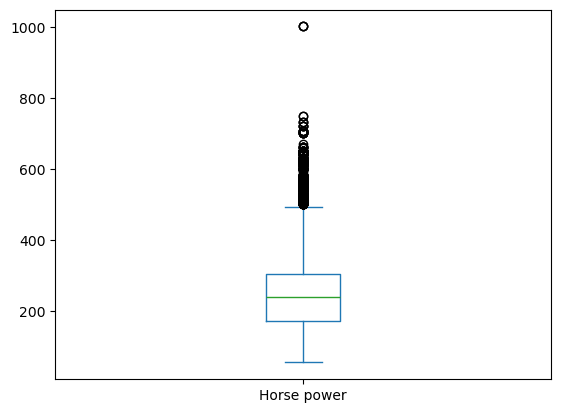

In [297]:
df['Horse power'].plot(kind='box')

In [299]:
q1 = df['highway MPG'].quantile(0.25)
q3 = df['highway MPG'].quantile(0.75)
iqr = q3-q1
ll= max(df['highway MPG'].min(),q1-1.5*iqr)
ul = min(df['highway MPG'].max(),q3+1.5*iqr)

In [301]:
df['highway MPG'] =df['highway MPG'].clip(ll,ul)

In [303]:
df[df['highway MPG']>300]

Empty DataFrame
Columns: [Make, Model, Year, Fuel type, Horse power, Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, Price]
Index: []

In [305]:
df[df['Price']>1000000]

Make        Model  Year                    Fuel type  \
6000       Maybach    Landaulet  2011  premium unleaded (required)   
6001       Maybach    Landaulet  2012  premium unleaded (required)   
7973   Lamborghini     Reventon  2008  premium unleaded (required)   
10661      Bugatti  Veyron 16.4  2008  premium unleaded (required)   
10662      Bugatti  Veyron 16.4  2008  premium unleaded (required)   
10663      Bugatti  Veyron 16.4  2009  premium unleaded (required)   

       Horse power  Cylinders Transmission Type     Driven_Wheels  \
6000         620.0       12.0         AUTOMATIC  rear wheel drive   
6001         620.0       12.0         AUTOMATIC  rear wheel drive   
7973         650.0       12.0  AUTOMATED_MANUAL   all wheel drive   
10661       1001.0       16.0  AUTOMATED_MANUAL   all wheel drive   
10662       1001.0       16.0  AUTOMATED_MANUAL   all wheel drive   
10663       1001.0       16.0  AUTOMATED_MANUAL   all wheel drive   

       Number of Doors                 Market Category Vehicle Size  \
6000               4.0  Exotic,Luxury,High-Performance        Large   
6001               4.0       Exotic,Luxury,Performance        Large   
7973               2.0         Exotic,High-Performance      Compact   
10661              2.0         Exotic,High-Performance      Compact   
10662              2.0         Exotic,High-Performance      Compact   
10663              2.0         Exotic,High-Performance      Compact   

      Vehicle Style  highway MPG  city mpg  Popularity    Price  
6000    Convertible           16        10          67  1380000  
6001    Convertible           16        10          67  1382750  
7973          Coupe           14         9        1158  1500000  
10661         Coupe           14         8         820  2065902  
10662         Coupe           14         8         820  1500000  
10663         Coupe           14         8         820  1705769

In [346]:
df.head(4)

Make       Model  Year                    Fuel type  Horse power  Cylinders  \
0  BMW  1 Series M  2011  premium unleaded (required)        335.0        6.0   
1  BMW    1 Series  2011  premium unleaded (required)        300.0        6.0   
2  BMW    1 Series  2011  premium unleaded (required)        300.0        6.0   
3  BMW    1 Series  2011  premium unleaded (required)        230.0        6.0   

  Transmission Type     Driven_Wheels  Number of Doors  \
0            MANUAL  rear wheel drive              2.0   
1            MANUAL  rear wheel drive              2.0   
2            MANUAL  rear wheel drive              2.0   
3            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   

   highway MPG  city mpg  Popularity  Price  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450

## Data manipulation
#### Analyze each and every column to get useful insights.

In [308]:
df['Make'].nunique()  # no of different brands

48

In [310]:
df['Make'].value_counts().nlargest(5).index # top 5 brands which are having more no of cars

Index(['Chevrolet', 'Ford', 'Toyota', 'Volkswagen', 'Nissan'], dtype='object', name='Make')

In [312]:
df['Year'].value_counts().nlargest(5).index #top 5 years  are having more no of manufacturing car.

Index([2016, 2015, 2017, 2014, 2009], dtype='int64', name='Year')

In [314]:
df['Price'].min()

2000

In [316]:
df['Price'].max()

2065902

In [318]:
# Top 3 vehicle brands have the highest average horsepower
df.groupby("Make")["Horse power"].mean().nlargest(3)

Make
Bugatti        1001.000000
Lamborghini     614.076923
McLaren         610.400000
Name: Horse power, dtype: float64

In [322]:
# Relationship between MPG and price
df[["highway MPG", "city mpg", "Price"]].corr()

highway MPG  city mpg     Price
highway MPG     1.000000  0.691209 -0.243671
city mpg        0.691209  1.000000 -0.162343
Price          -0.243671 -0.162343  1.000000

In [324]:
# Impact of cylinders on MPG
df.groupby("Cylinders")[["highway MPG", "city mpg"]].mean()

highway MPG    city mpg
Cylinders                         
0.0          42.000000  111.196429
3.0          38.233333   32.033333
4.0          31.303486   24.037594
5.0          26.065089   18.775148
6.0          24.013740   17.194923
8.0          20.177099   14.185242
10.0         20.000000   12.569231
12.0         17.736842   11.250000
16.0         14.000000    8.000000

In [326]:
# Most common transmission type among high-performance cars
df[df["Vehicle Style"].str.contains("Coupe|Convertible", na=False)]["Transmission Type"].value_counts()

Transmission Type
MANUAL              877
AUTOMATIC           812
AUTOMATED_MANUAL    251
UNKNOWN               4
Name: count, dtype: int64

In [328]:
#Most fuel-efficient driven wheel type
df.groupby("Driven_Wheels")[["highway MPG", "city mpg"]].mean()

highway MPG   city mpg
Driven_Wheels                            
all wheel drive      25.870017  19.106153
four wheel drive     19.876981  15.124528
front wheel drive    30.775609  23.786633
rear wheel drive     22.852428  16.585616

In [330]:
# Vehicle size vs. price comparison
df.groupby("Vehicle Size")["Price"].mean()

Vehicle Size
Compact    35506.201138
Large      55352.122624
Midsize    40031.293133
Name: Price, dtype: float64

In [332]:
# Best fuel efficiency per price ratio
df.loc[:, ["Make", "Model", "highway MPG", "city mpg", "Price"]].assign(
    efficiency_per_dollar=lambda x: (x["highway MPG"] + x["city mpg"]) / (2 * x["Price"])
).sort_values(by="efficiency_per_dollar", ascending=False)

Make        Model  highway MPG  city mpg    Price  \
2379         Honda    Civic CRX           42        36     2000   
2374         Honda    Civic CRX           42        36     2000   
6427     Chevrolet        Metro           42        34     2000   
6431     Chevrolet        Metro           41        32     2000   
6429     Chevrolet        Metro           39        33     2000   
...            ...          ...          ...       ...      ...   
6001       Maybach    Landaulet           16        10  1382750   
7973   Lamborghini     Reventon           14         9  1500000   
10662      Bugatti  Veyron 16.4           14         8  1500000   
10663      Bugatti  Veyron 16.4           14         8  1705769   
10661      Bugatti  Veyron 16.4           14         8  2065902   

       efficiency_per_dollar  
2379                0.019500  
2374                0.019500  
6427                0.019000  
6431                0.018250  
6429                0.018000  
...                      ...  
6001                0.000009  
7973                0.000008  
10662               0.000007  
10663               0.000006  
10661               0.000005  

[11199 rows x 6 columns]

In [334]:
df.to_csv("manipulated_dataset.csv", index=False)

## Data visualization

### Univariate analysis

In [92]:
import plotly.express as px

In [94]:
df.head(2)

Make       Model  Year                    Fuel type  Horse power  Cylinders  \
0  BMW  1 Series M  2011  premium unleaded (required)        335.0        6.0   
1  BMW    1 Series  2011  premium unleaded (required)        300.0        6.0   

  Transmission Type     Driven_Wheels  Number of Doors  \
0            MANUAL  rear wheel drive              2.0   
1            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   

   highway MPG  city mpg  Popularity  Price  
0           26        19        3916  46135  
1           28        19        3916  40650

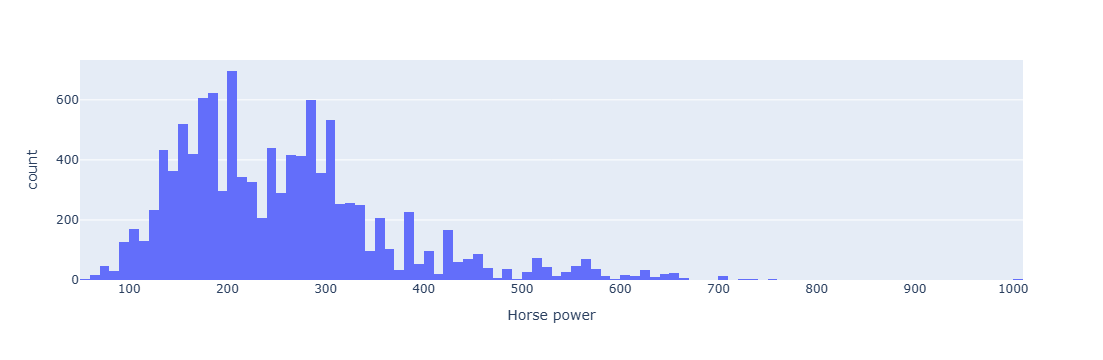

In [96]:
px.histogram(data_frame=df, x= 'Horse power')

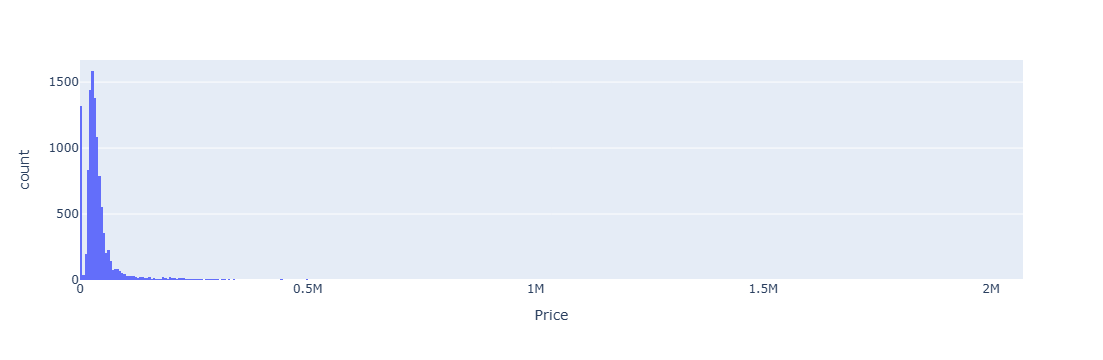

In [102]:
px.histogram(data_frame=df, x= 'Price')

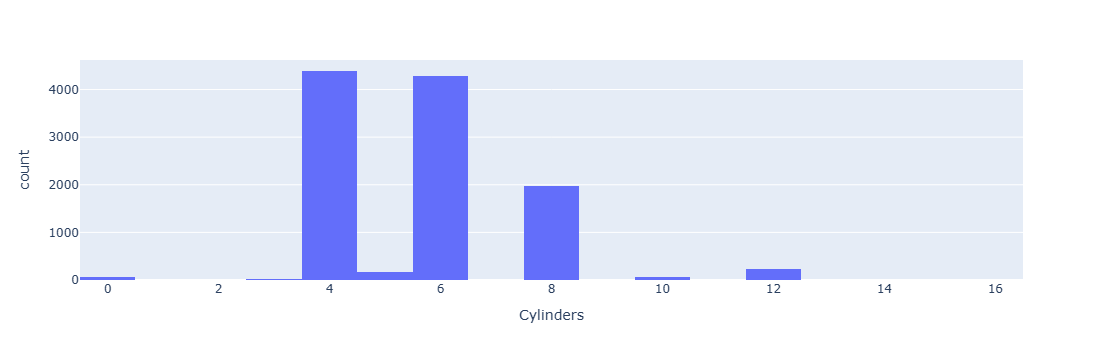

In [106]:
px.histogram(data_frame=df, x= 'Cylinders')

In [108]:
df.head(3)

Make       Model  Year                    Fuel type  Horse power  Cylinders  \
0  BMW  1 Series M  2011  premium unleaded (required)        335.0        6.0   
1  BMW    1 Series  2011  premium unleaded (required)        300.0        6.0   
2  BMW    1 Series  2011  premium unleaded (required)        300.0        6.0   

  Transmission Type     Driven_Wheels  Number of Doors  \
0            MANUAL  rear wheel drive              2.0   
1            MANUAL  rear wheel drive              2.0   
2            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   

   highway MPG  city mpg  Popularity  Price  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350

<Axes: xlabel='Make'>

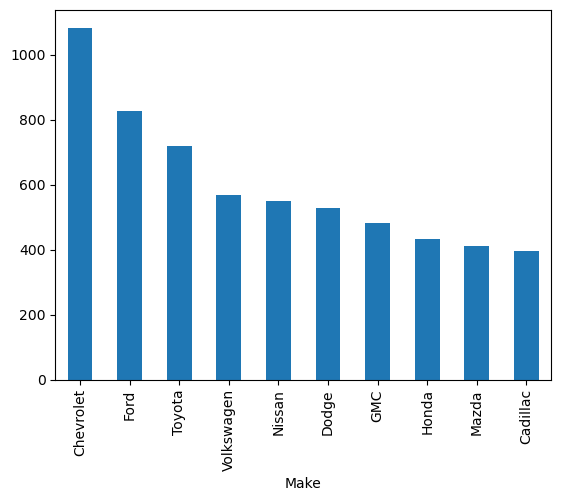

In [110]:
df['Make'].value_counts().nlargest(10).plot(kind='bar')

<Axes: ylabel='count'>

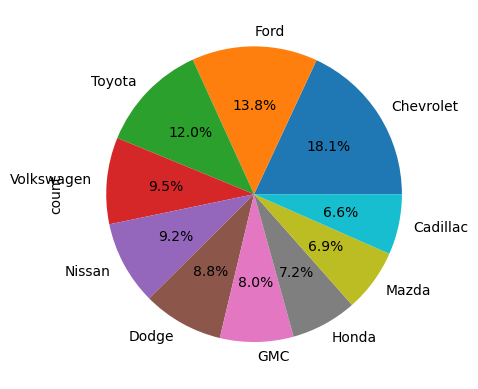

In [112]:
df['Make'].value_counts().nlargest(10).plot(kind='pie',autopct='%.1f%%')

<Axes: ylabel='count'>

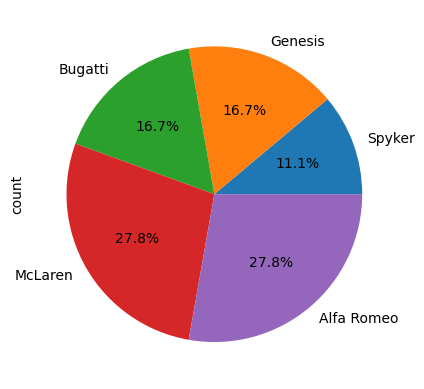

In [114]:
df['Make'].value_counts().nsmallest(5).plot(kind='pie',autopct='%.1f%%')  #least 5 cars brand

<Axes: xlabel='Year'>

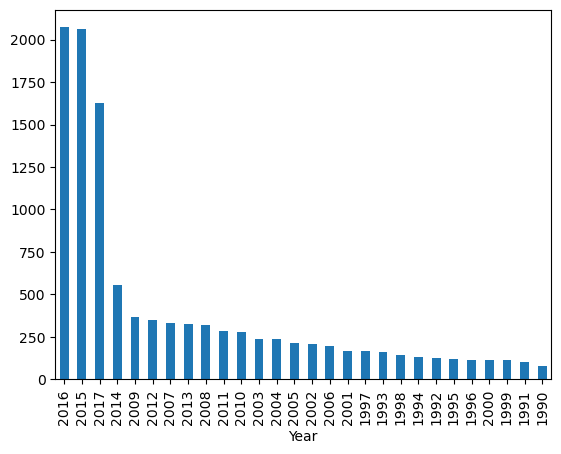

In [116]:
df['Year'].value_counts().plot(kind='bar')

<Axes: xlabel='Fuel type'>

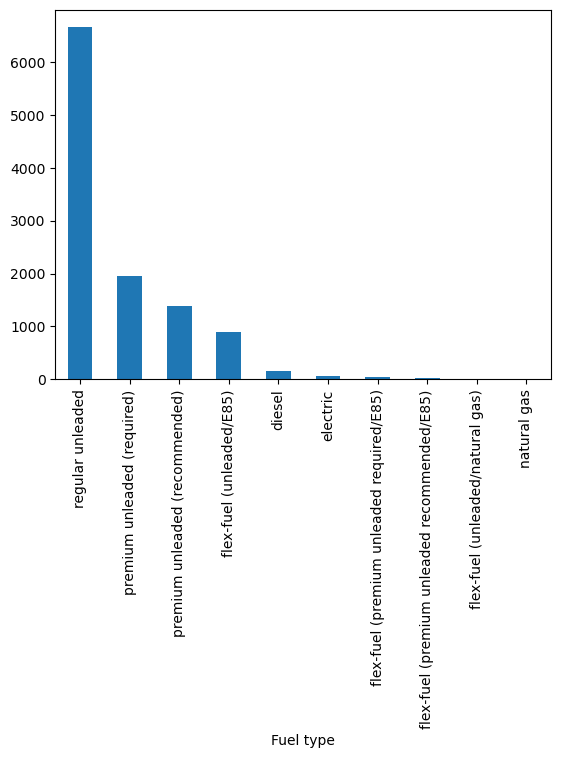

In [118]:
df['Fuel type'].value_counts().plot(kind='bar')

<Axes: xlabel='Transmission Type'>

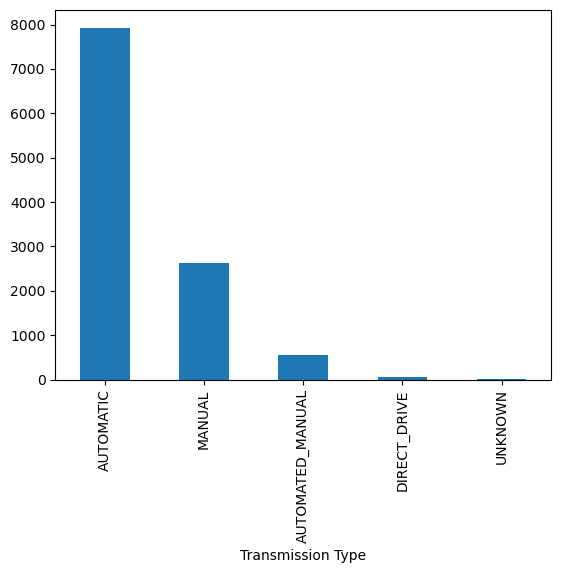

In [120]:
df['Transmission Type'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

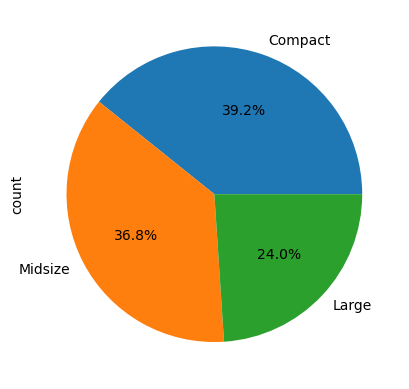

In [122]:
df['Vehicle Size'].value_counts().plot(kind='pie',autopct='%.1f%%')

<Axes: xlabel='Vehicle Style'>

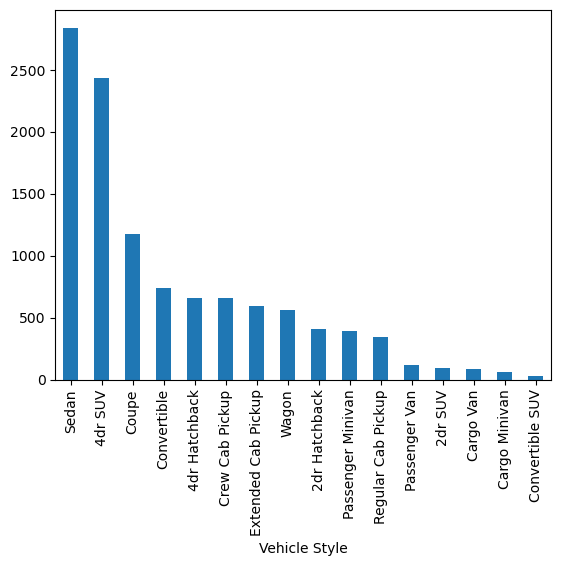

In [124]:
df['Vehicle Style'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

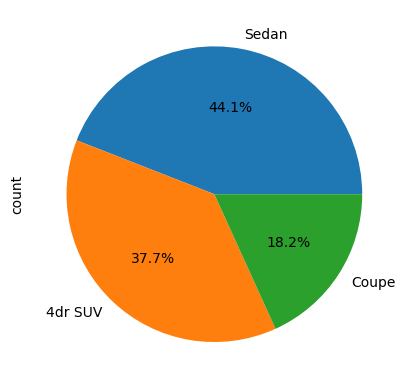

In [130]:
df['Vehicle Style'].value_counts().nlargest(3).plot(kind='pie',autopct='%.1f%%')

### Bi Variate analysis

In [133]:
df.select_dtypes(exclude='object')

Year  Horse power  Cylinders  Number of Doors  highway MPG  city mpg  \
0      2011        335.0        6.0              2.0           26        19   
1      2011        300.0        6.0              2.0           28        19   
2      2011        300.0        6.0              2.0           28        20   
3      2011        230.0        6.0              2.0           28        18   
4      2011        230.0        6.0              2.0           28        18   
...     ...          ...        ...              ...          ...       ...   
11194  2012        300.0        6.0              4.0           23        16   
11195  2012        300.0        6.0              4.0           23        16   
11196  2012        300.0        6.0              4.0           23        16   
11197  2013        300.0        6.0              4.0           23        16   
11198  2006        221.0        6.0              4.0           26        17   

       Popularity  Price  
0            3916  46135  
1            3916  40650  
2            3916  36350  
3            3916  29450  
4            3916  34500  
...           ...    ...  
11194         204  46120  
11195         204  56670  
11196         204  50620  
11197         204  50920  
11198          61  28995  

[11199 rows x 8 columns]

<Axes: xlabel='Horse power', ylabel='Price'>

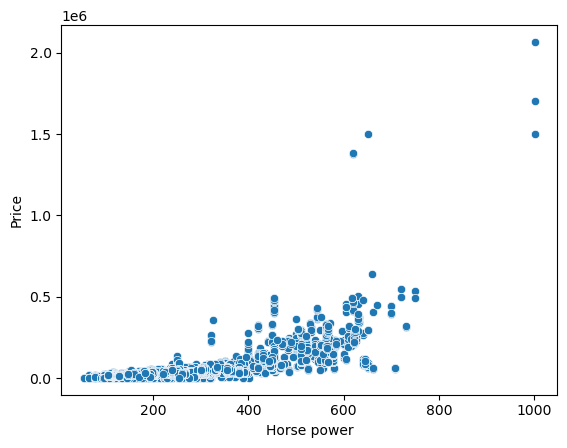

In [135]:
sns.scatterplot(data=df,x='Horse power',y='Price')

<Axes: xlabel='Cylinders', ylabel='Price'>

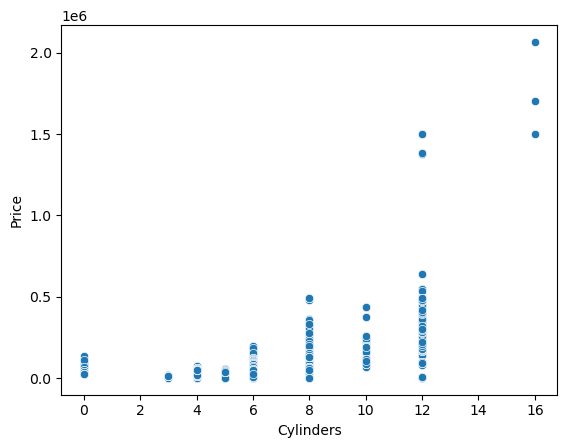

In [137]:
sns.scatterplot(data=df,x='Cylinders',y='Price')

* Asthe no of cylinders are increasing , the the price of the car is also increased.
* 16 cylinders cars are most expensive crs

In [140]:
df.select_dtypes(exclude='object')

Year  Horse power  Cylinders  Number of Doors  highway MPG  city mpg  \
0      2011        335.0        6.0              2.0           26        19   
1      2011        300.0        6.0              2.0           28        19   
2      2011        300.0        6.0              2.0           28        20   
3      2011        230.0        6.0              2.0           28        18   
4      2011        230.0        6.0              2.0           28        18   
...     ...          ...        ...              ...          ...       ...   
11194  2012        300.0        6.0              4.0           23        16   
11195  2012        300.0        6.0              4.0           23        16   
11196  2012        300.0        6.0              4.0           23        16   
11197  2013        300.0        6.0              4.0           23        16   
11198  2006        221.0        6.0              4.0           26        17   

       Popularity  Price  
0            3916  46135  
1            3916  40650  
2            3916  36350  
3            3916  29450  
4            3916  34500  
...           ...    ...  
11194         204  46120  
11195         204  56670  
11196         204  50620  
11197         204  50920  
11198          61  28995  

[11199 rows x 8 columns]

<Axes: xlabel='Number of Doors', ylabel='Price'>

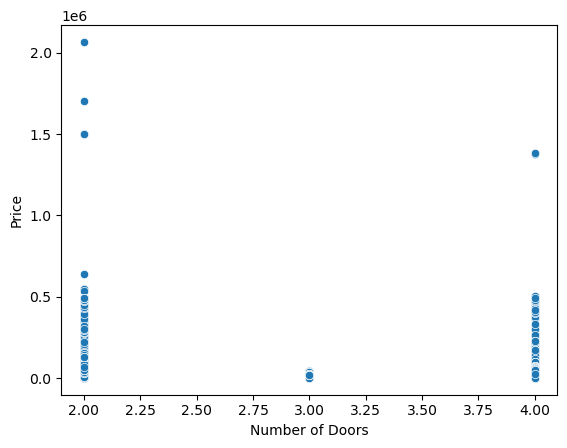

In [142]:
sns.scatterplot(data=df,x='Number of Doors',y='Price')

* Except 3 cars , the no of doors are not influncing the price of the car.

<Axes: xlabel='highway MPG', ylabel='Price'>

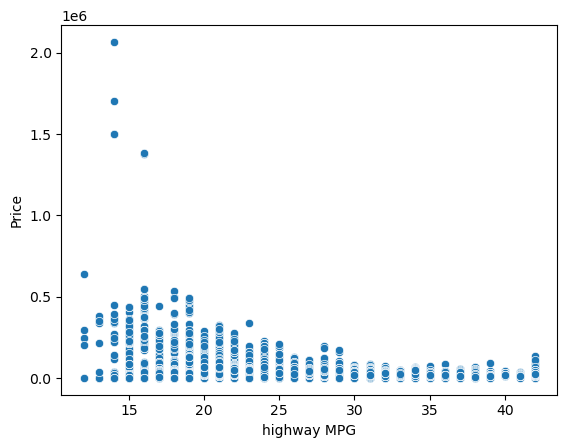

In [146]:
sns.scatterplot(data=df,x='highway MPG',y='Price')

<Axes: xlabel='city mpg', ylabel='Price'>

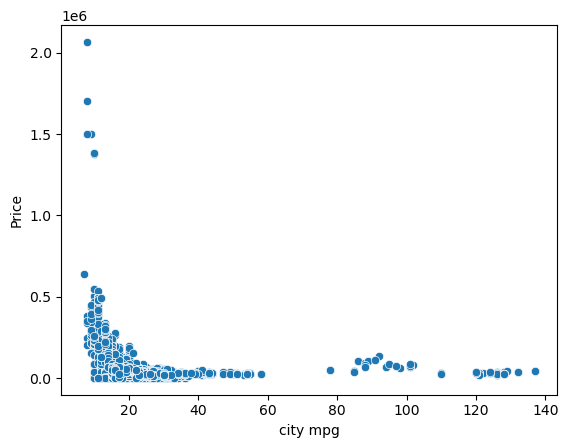

In [148]:
sns.scatterplot(data=df,x='city mpg',y='Price')

<Axes: xlabel='Popularity', ylabel='Price'>

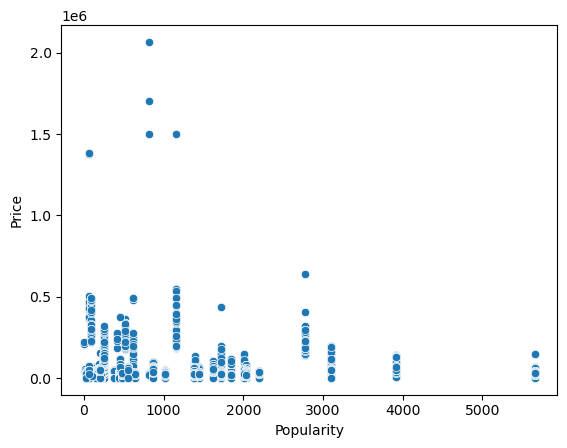

In [150]:
sns.scatterplot(data=df,x='Popularity',y='Price')

### Category vs Numerical

<Axes: xlabel='Year', ylabel='Price'>

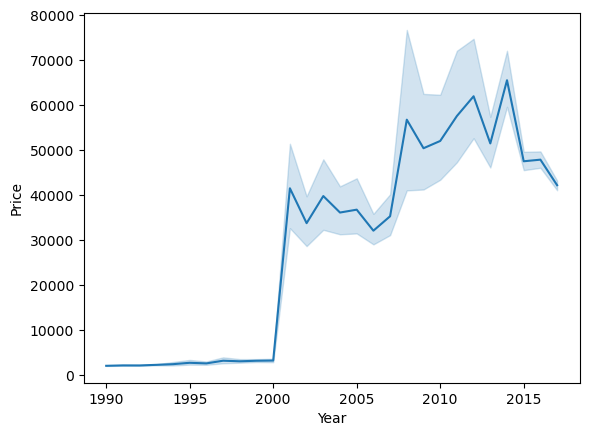

In [159]:
sns.lineplot(data=df ,x= 'Year', y= 'Price')

*  the year increasing and the car price also increasing.

In [163]:
df.head(3)

Make       Model  Year                    Fuel type  Horse power  Cylinders  \
0  BMW  1 Series M  2011  premium unleaded (required)        335.0        6.0   
1  BMW    1 Series  2011  premium unleaded (required)        300.0        6.0   
2  BMW    1 Series  2011  premium unleaded (required)        300.0        6.0   

  Transmission Type     Driven_Wheels  Number of Doors  \
0            MANUAL  rear wheel drive              2.0   
1            MANUAL  rear wheel drive              2.0   
2            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   

   highway MPG  city mpg  Popularity  Price  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350

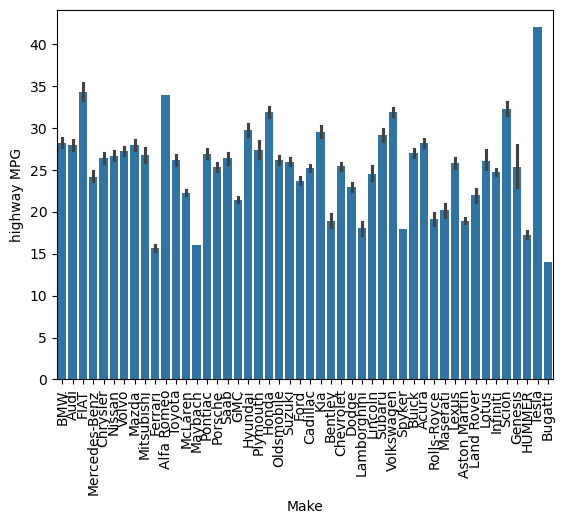

In [171]:
sns.barplot(data=df,x='Make',y='highway MPG')
plt.xticks(rotation=90)
plt.show()

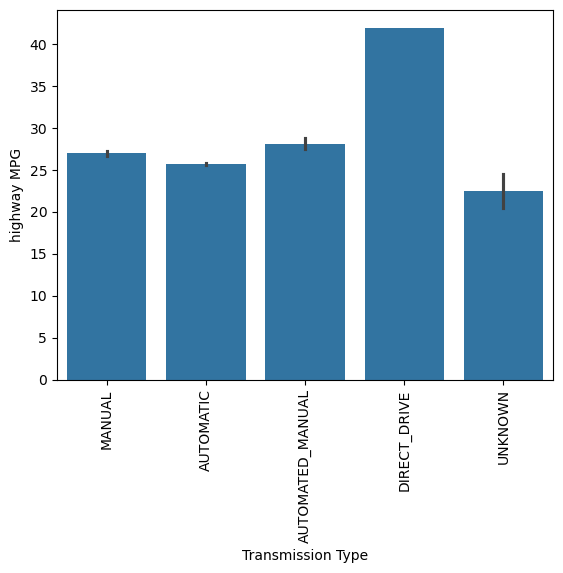

In [179]:
sns.barplot(data=df,x='Transmission Type',y='highway MPG')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Vehicle Size', ylabel='city mpg'>

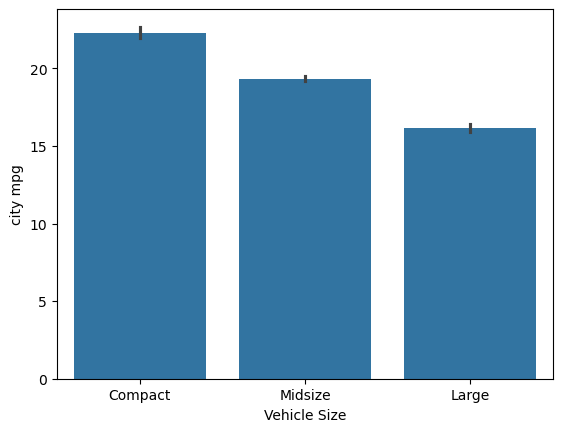

In [181]:
sns.barplot(data=df,x='Vehicle Size',y='city mpg')

<Axes: xlabel='Transmission Type', ylabel='Price'>

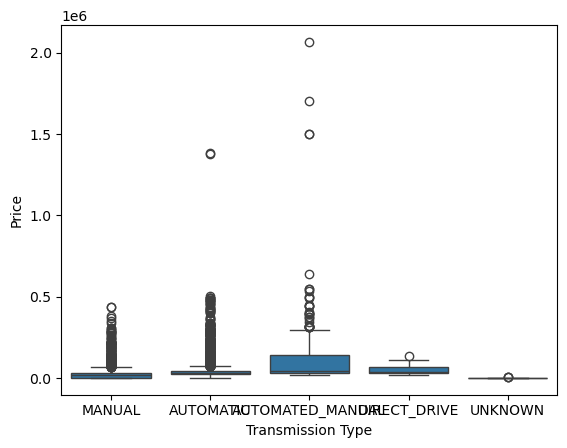

In [187]:
sns.boxplot(data=df,x='Transmission Type',y='Price')

### Multi variate analysis

<Axes: >

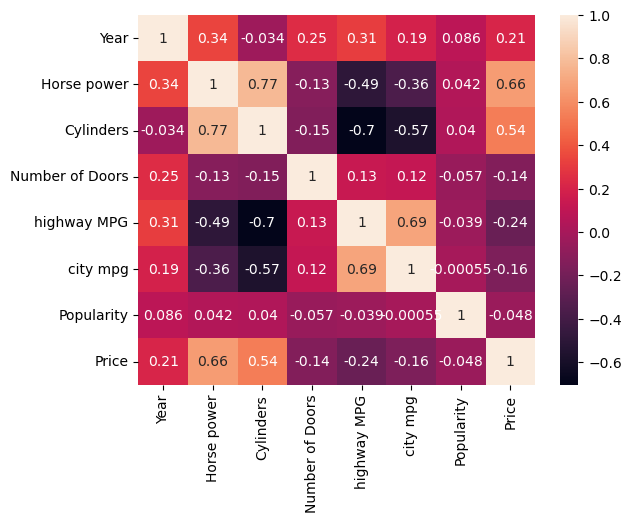

In [190]:
sns.heatmap(df.corr(numeric_only=True),annot=True)